# Lab 3: Rigid Registration


## Remainder

Among other useful information, it tells you to make a copy of this Colab notebook BEFORE you try to run it:

- Make a copy on your own Colab space by clicking on the `copy to drive` button.
- Alternatively you could go to the menu `File > Save a copy in Drive`
- Then, open your new file on a new tap and rename it, and you’re ready to start tinkering with the code
- Look carefully at the existing code before you execute it. Try to understand what the code is doing. Part of your learning outcome is to understand it, and we will quiz you about it.
- In several places of the code, you’ll find `#__________TO DO_________`.
There you should introduce your code.

Once you are done, submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.

Use `$\color{red}{\text{This is my red text}}$` to write "$\color{red}{\text{This is my red text}}$".

## Goals of this lab
The aim of this lab is to develop competences regarding teamwork and problem solving. By developing the proposed activity you will also become familiar with SIFT and planar transformations for rigid image registration: how to extract invariant features, how to describe them, how to match them and how to use them to compute a homography. Most importantly, this should give you some feeling about the strengths and weaknesses of local feature-based approaches.
It should be noted that before you start this activity, you should read Lowe’s paper on SIFT:

David G. Lowe, "Distinctive image features from scale-invariant keypoints," International Journal of Computer Vision, 60, 2 (2004), pp. 91-110.
The paper can be downloaded from [here](http://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf).

This lab requires working in teams of two (exceptionally three) students. The labs will be organized on the first lab session by the professor who acts as lab instructor.

Students will have to:

1. Test Lowe’s implementation on a set of images showing some skin lesions and compare the obtained results with the provided by a third party library.
2. Register the images pairs corresponding to the same skin lesion using Lowe’s implementation to detect and match features, and implementing different motion models by estimating homography matrices.
3. Improve the registration accuracy by means of data normalization for the homography estimation.

# Loading the required files
You can load into the temporal workspace of Colab the following required files:

*   the data files `LAB3_data`. Download them from Moodle to your computer and uncompress them.

You should copy these files from your computer using the function `files.upload()`. Use the `Choose Files` button to upload both files from your local drive.

Don't use Safari, it is preferable to use google chrome

In [6]:
# from google.colab import files
# uploaded = files.upload()

## Additional tools
In this lab, we will also make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data
- Routines in the aux_utils.py file, which should already be in the local directory
- Opencv
-...

In [1]:
import math, copy
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#from aux_utils import plt_house_x, plt_contour_wgrad, plt_gradients, plt_cost_vs_theta1
# from google.colab import files
# import time
from IPython import display
from time import sleep
# import opencv
import cv2
# from google.colab.patches import cv2_imshow

import pandas as pd
import io

#Import math Library
import math 
import scipy.linalg as linalg

Next, we will load images `00.png`, `01.png`, `02.png` and `03.png`

In [2]:
img00c = cv2.imread("data/00.png") 
img01c = cv2.imread("data/01.png")
img02c = cv2.imread("data/02.png")
img03c = cv2.imread("data/03.png")

And the csv files with keypoints

In [3]:
keypoints_00 = genfromtxt('data/Keypoints_00.csv', delimiter=',', skip_header = 0)
keypoints_01 = genfromtxt('data/Keypoints_01.csv', delimiter=',', skip_header = 0)
keypoints_02 = genfromtxt('data/Keypoints_02.csv', delimiter=',', skip_header = 0)
keypoints_03 = genfromtxt('data/Keypoints_03.csv', delimiter=',', skip_header = 0)

print(np.shape(keypoints_00))
print(keypoints_00)

(64, 2)
[[1266.3   232.7 ]
 [1266.3   320.63]
 [1266.3   407.7 ]
 [1266.3   495.64]
 [1266.3   582.7 ]
 [1266.3   670.63]
 [1266.3   757.7 ]
 [1266.3   845.63]
 [1178.4   232.7 ]
 [1178.5   320.5 ]
 [1178.5   408.  ]
 [1178.5   495.5 ]
 [1178.5   583.  ]
 [1178.5   670.5 ]
 [1178.5   758.  ]
 [1178.3   845.65]
 [1091.3   232.7 ]
 [1091.    320.5 ]
 [1091.    408.  ]
 [1091.    495.5 ]
 [1091.    583.  ]
 [1091.    670.5 ]
 [1091.    758.  ]
 [1091.3   845.63]
 [1003.4   232.7 ]
 [1003.5   320.5 ]
 [1003.5   408.  ]
 [1003.5   495.5 ]
 [1003.5   583.  ]
 [1003.5   670.5 ]
 [1003.5   758.  ]
 [1003.3   845.65]
 [ 916.3   232.7 ]
 [ 916.    320.5 ]
 [ 916.    408.  ]
 [ 916.    495.5 ]
 [ 916.    583.  ]
 [ 916.    670.5 ]
 [ 916.    758.  ]
 [ 916.3   845.64]
 [ 828.37  232.7 ]
 [ 828.5   320.5 ]
 [ 828.5   407.99]
 [ 828.5   495.5 ]
 [ 828.5   583.  ]
 [ 828.5   670.5 ]
 [ 828.5   758.  ]
 [ 828.35  845.65]
 [ 741.3   232.7 ]
 [ 741.    320.5 ]
 [ 741.    408.  ]
 [ 741.    495.5 ]
 [ 7

Now plot img00c, img01c, img02c, img03c all images using `cv2_imshow` from `opencv`

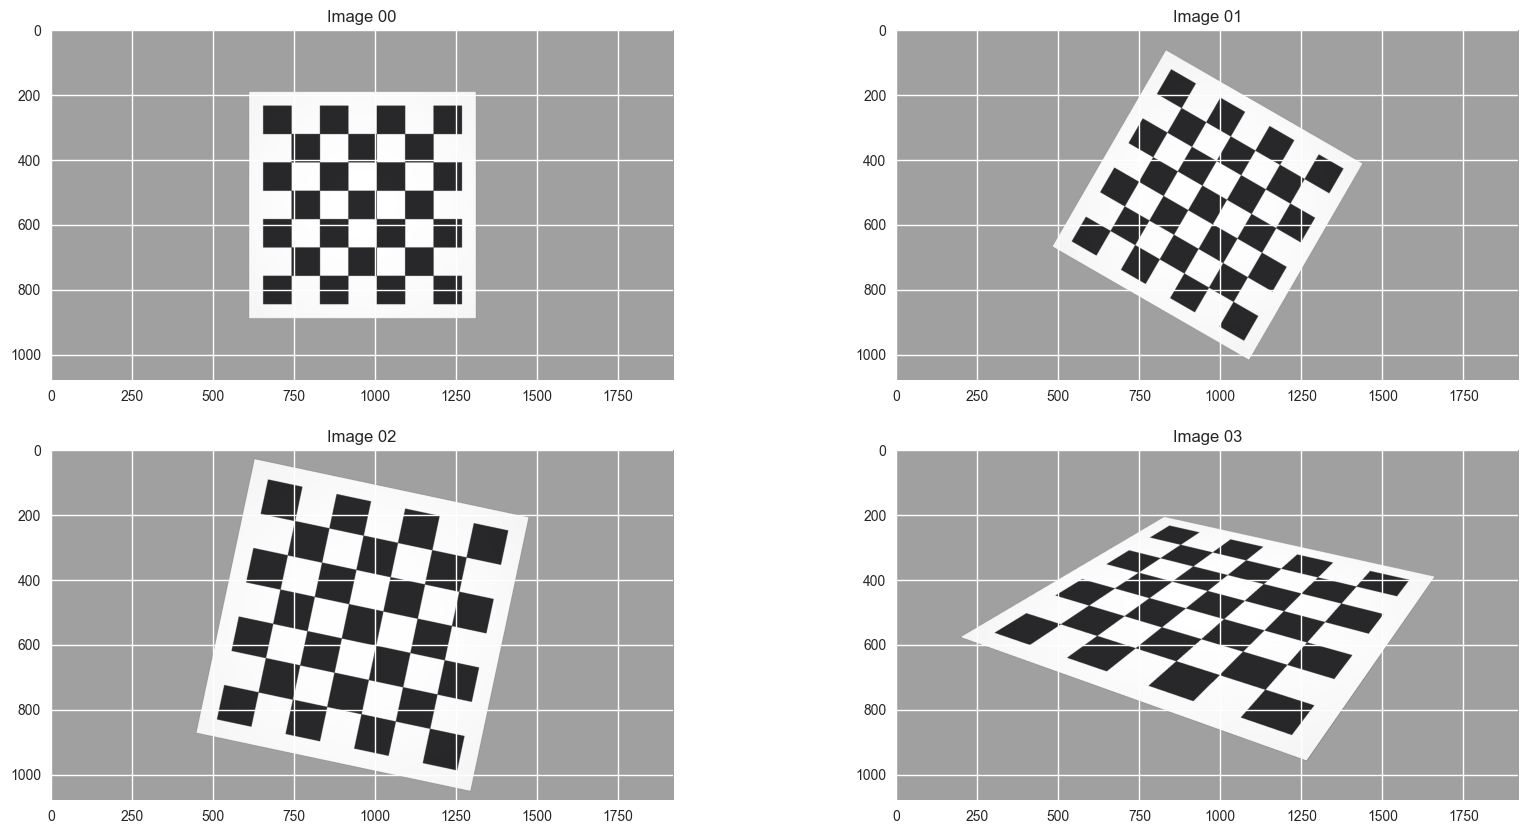

In [4]:
# Plot the images
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img00c)
plt.title('Image 00')
plt.subplot(2,2,2)
plt.imshow(img01c)
plt.title('Image 01')
plt.subplot(2,2,3)
plt.imshow(img02c)
plt.title('Image 02')
plt.subplot(2,2,4)
plt.imshow(img03c)
plt.title('Image 03')
plt.show()

Plot Keypoints on images.

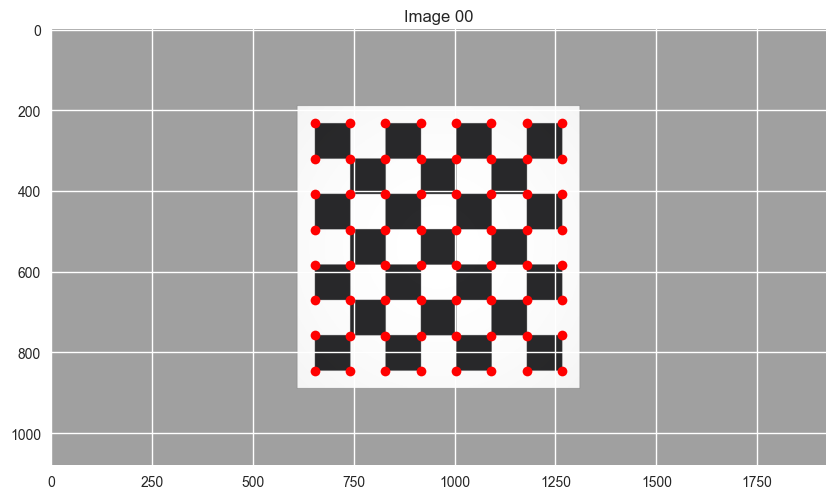

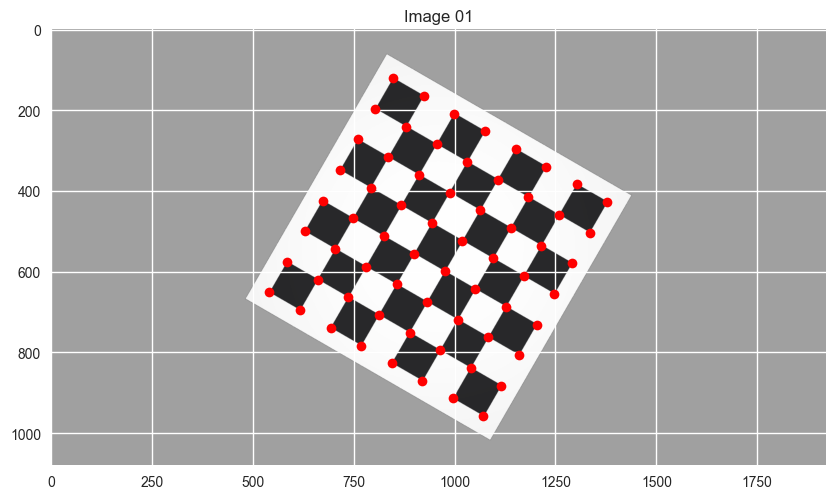

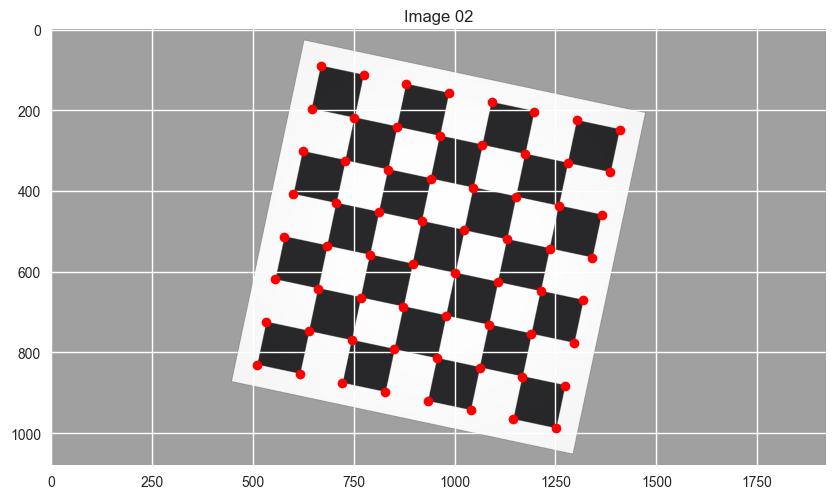

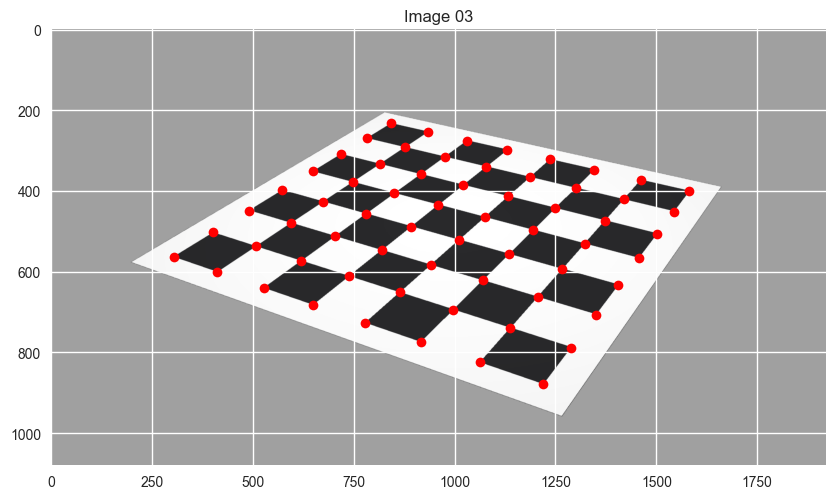

In [5]:
# Plot the keypoints

def plot_keypoints(img, keypoints, names):
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.plot(keypoints[:,0], keypoints[:,1], 'ro')
  plt.title(names)
  plt.show()

list_images = [img00c, img01c, img02c, img03c]
list_keypoints = [keypoints_00, keypoints_01, keypoints_02, keypoints_03]
names = ['Image 00', 'Image 01', 'Image 02', 'Image 03']

for images, keypoints, name in zip(list_images, list_keypoints, names):
  plot_keypoints(images, keypoints, name)

## Compute Homography

Implement the function:

H = computeHomography(features, matches, model)

where model can be ('Euclidean', 'Similarity', 'Affine', 'Porjective')

follow your notes from MIRA lessons, don't use any opencv existing function

In [71]:


def computeAffine(features, matches):
    A = []
    b = []
    for i in range(len(features)):
        x = features[i][0]
        y = features[i][1]
        A.append([x, y, 1, 0, 0, 0])
        A.append([0, 0, 0, x, y, 1])
        b.append(matches[i][0])
        b.append(matches[i][1])
    A = np.array(A)
    x = np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)), (np.matmul(np.transpose(A),b)))
    return x


def computeProjective(features, matches):
    A = []
    b = []
    for i in range(len(features)):
        x = features[i][0]
        y = features[i][1]
        u = matches[i][0]
        v = matches[i][1]
        A.append([x, y, 1, 0, 0, 0, -x*u, -y*u])
        A.append([0, 0, 0, x, y, 1, -x*v, -y*v])
        b.append(matches[i][0])
        b.append(matches[i][1])

    A = np.array(A)
    x = np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)), (np.matmul(np.transpose(A),b)))
    return x

def computeSimilarity(features, matches):
    A = []
    b = []
    for i in range(len(features)):
        x = features[i][0]
        y = features[i][1]
        A.append([x, y, 1, 0, 0, 0])
        A.append([0, 0, 0, x, y, 1])
        b.append(matches[i][0])
        b.append(matches[i][1])
    A = np.array(A)
    x = np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)), (np.matmul(np.transpose(A),b)))
    return x

def computeHomography(features, matches, model):
    # Initialize the homography matrix
    H = np.zeros((3,3))
    
    # Compute the homography matrix
    if model == 'Affine':
        flatH = computeAffine(features, matches)
        flatH = np.hstack((flatH,np.array([0, 0, 1]).ravel()))
        H = np.reshape(flatH, (3,3))

    elif model == 'Projective':
        flatH = computeProjective(features, matches)
        flatH = np.hstack((flatH,np.array([1]).ravel()))
        H = np.reshape(flatH, (3,3))
    return H



In [72]:
h = computeHomography(features, matches, 'Projective')
h

array([[ 1.20855378e+00, -2.57670990e-01, -6.10122933e+01],
       [ 2.57486630e-01,  1.20772500e+00, -3.59036436e+02],
       [ 4.51648462e-07, -5.87544598e-07,  1.00000000e+00]])

In [64]:
def transformeKeypoints(keypoints, h):
    # Initialize the homography matrix
    transformed_keypoints = np.zeros((len(keypoints),2))
    
    # Compute the homography matrix
    for i in range(len(keypoints)):
        x = keypoints[i][0]
        y = keypoints[i][1]
        z = 1
        p = np.array([x, y, z])
        p = np.dot(h, p)
        p = p/p[2]
        transformed_keypoints[i] = p[:2]
    return transformed_keypoints

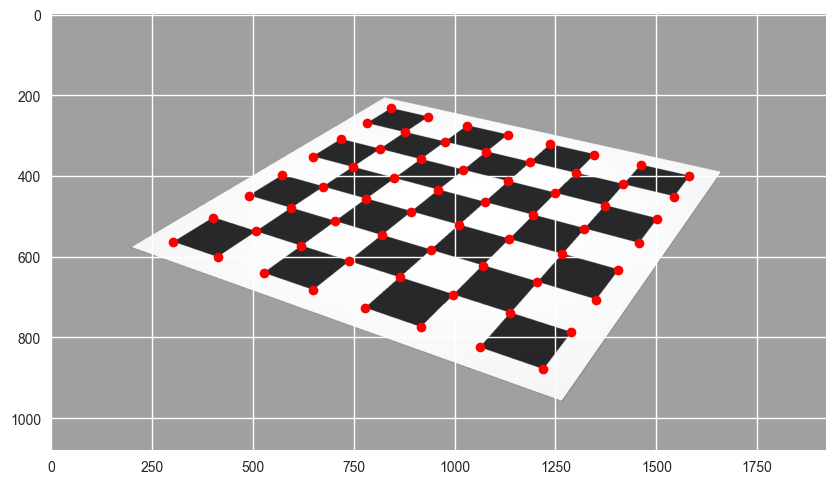

In [73]:
features = list_keypoints[0]
matches = list_keypoints[3]

h = computeHomography(features, matches, 'Projective')
transformed= transformeKeypoints(features, h)
# show the transformed points
plt.figure(figsize=(10,10))
plt.imshow(img03c)
plt.plot(transformed[:,0], transformed[:,1], 'ro')
plt.show()

##Compute Eucliedean Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

##Compute Similarity Homography
Compute the Similarity Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

##Compute Affine Homography

Compute the Affine Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

##Compute Projective Homography

Compute the Euclidean Homography between all loaded images

After computing them use the function `cv2.warpPerspective` to check the obtainen result

##Comment the previous obtained results.

Which is the best homography for each image pair? Why?

## Detect SIFT Keypoints and Descriptors
Now we will register real images.

Register skin1.jpg with skin2.jpg

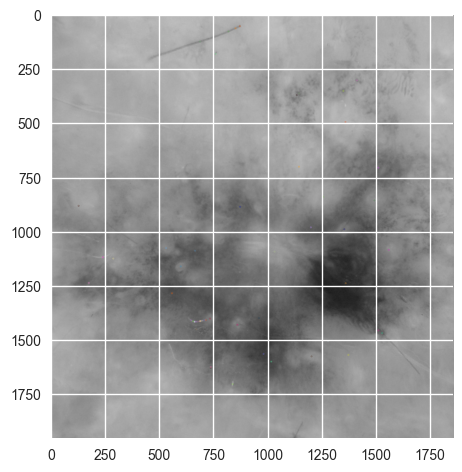

In [29]:
# Read images
img_skin1 = cv2.imread("data/skin1.jpg")
img_skin2 = cv2.imread("data/skin2.jpg")

# Convert to grayscale
img_skin1_gray = cv2.cvtColor(img_skin1, cv2.COLOR_BGR2GRAY)
img_skin2_gray = cv2.cvtColor(img_skin2, cv2.COLOR_BGR2GRAY)

plt.imshow(img_skin1, cmap='gray')

# Create sift functıon and detect keypoints
sift = cv2.SIFT_create()
kp = sift.detect(img_skin1_gray,None)

# Plot iım
img=cv2.drawKeypoints(img_skin1_gray,kp,img_skin1)
cv2.imwrite('sift_keypoints.jpg',img)
plt.imshow(img, cmap='gray')


# Sift function


## Plot the Keypoints


## Compute Brute Force Matching

In [ ]:
# to match the keypoints in the two images

Plot matches

## Lowe match

Implement the function `SIFT_match` following the article "Distinctive image features from scale-invariant keypoints" David G. Lowe.

In [ ]:
# looking at best 1 and best 2 match. 

Recompute the matches using your function

Plot the new matches

## Select good matches

From the previous obtained matches, apply Lowe's threshold to keep only the good ones.

## Compute Homographies

Compute the homography between both images using opencv function `cv2.findHomography`

Plot one of the images warped acording to the obtained Homograhy

In [ ]:
# how one image moved respect to the other

Now Compute the Homography between both images using your Homography Computation function. Use all models and and compare the results

## You should notice that you have outliers when you compute the Homography.

Implement RANSAC function and recompute all the Homographies using it.

Finally Warp one of the images and compare your results with the ones obtained using opencv functions.

In [ ]:
# use your own function to compute homography.
# Outliers


## Congratulations!
In this lab you:
- tested SIFT Algorithm
- implemented homography computation

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.